In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("spam.csv" , sep=",", encoding='latin-1' , names=["label","message","a","aa","sa"])
data=data.drop(0).dropna(axis=1)
data

,label,message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [4]:
data['length'] = data['message'].apply(len)
data.head()

,label,message,length
1,ham,"Go until jurong point, crazy.. Available only ...",111
2,ham,Ok lar... Joking wif u oni...,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,ham,U dun say so early hor... U c already then say...,49
5,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

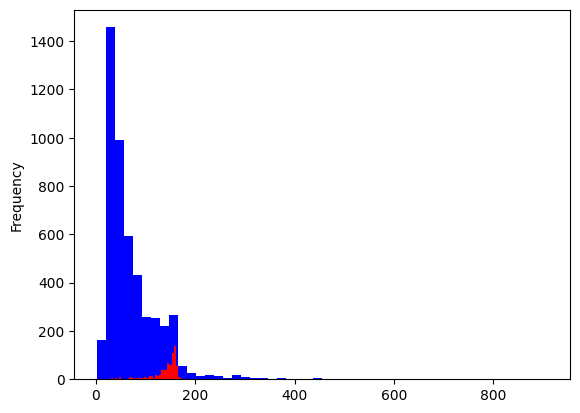

In [41]:
hdata=data.loc[data['label'] == 'ham']
sdata=data.loc[data['label'] == 'spam']
hdata['length'].plot(bins=50,kind='hist',color='blue')
# sdata['length']  = hdata['length'].twinx()
sdata['length'].plot(bins=50,kind='hist',color='red')
# hdata['length'].plot(bins=100,kind='hist',color='b')

text preproseccing

stopwords , punctuation, 

In [6]:
import string
# from nltk.corpus import stopwords
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
def process(msg):
    nopunc = [c for c in msg if c not in string.punctuation]
    nopunc=''.join(nopunc)
    return [w for w in nopunc.split() if w.lower() not in stopwords]

In [7]:
data['message'].apply(process)

1       [Go, jurong, point, crazy, Available, bugis, n...
2                          [Ok, lar, Joking, wif, u, oni]
3       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
4           [U, dun, say, early, hor, U, c, already, say]
5       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5568    [2nd, time, tried, 2, contact, u, U, å£750, Po...
5569                   [Ì, b, going, esplanade, fr, home]
5570                     [Pity, mood, Soany, suggestions]
5571    [guy, bitching, acted, like, id, interested, b...
5572                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
#bow -> bag of words
bow_transformer = CountVectorizer(analyzer=process).fit(data['message'])
data_bow=bow_transformer.transform(data['message'])
bow4=bow_transformer.transform([data['message'][3]])

In [47]:
bow4.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(data_bow)
data_tfidf=tfidf_transformer.transform(data_bow)

In [10]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 11003)	0.1909725859033143
  (0, 10964)	0.15964606600812142
  (0, 10570)	0.1399031851067661
  (0, 10398)	0.2118051872602214
  (0, 9143)	0.1611563042398638
  (0, 9091)	0.2253022095695746
  (0, 9050)	0.2253022095695746
  (0, 6470)	0.18460060785524732
  (0, 6244)	0.3477748370983395
  (0, 5535)	0.1886735733993242
  (0, 4652)	0.16446336178389345
  (0, 3882)	0.15434394973306392
  (0, 2754)	0.17653182127701653
  (0, 1909)	0.15260120989906273
  (0, 1808)	0.4506044191391492
  (0, 1529)	0.21770108079052697
  (0, 860)	0.2118051872602214
  (0, 442)	0.21770108079052697
  (0, 429)	0.21770108079052697
  (0, 422)	0.09655718066459201
  (0, 73)	0.2253022095695746


training the model

In [11]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(data_tfidf,data['label'])

In [12]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',data.label[3])

predicted: spam
expected: spam


In [13]:
all_predictions = spam_detect_model.predict(data_tfidf)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
# print(classification_report(data['label'],all_predictions))
print(confusion_matrix(data['label'],all_predictions))

[[4825    0]
 [ 114  633]]


training model using pipelining

In [15]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ( 'bow',CountVectorizer(analyzer=process)),
    # ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [36]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x0000025ED8BB01F0>)),
                ('classifier', MultinomialNB())])

In [37]:
predictions = pipeline.predict(msg_test)

In [38]:
print(classification_report(predictions,label_test))
print(confusion_matrix(label_test,predictions))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1472
        spam       0.89      0.98      0.94       200

    accuracy                           0.98      1672
   macro avg       0.95      0.98      0.96      1672
weighted avg       0.99      0.98      0.98      1672

[[1449    4]
 [  23  196]]


prediction after pipelining

In [39]:
to_pred = input()
pred=pipeline.predict([to_pred])
print("THE MESSAGE: ",to_pred,"\nis ",pred[0])

THE MESSAGE:  click here to win 10K dollars  
is  spam
